# Predict A Doctor's Consultation Fee 



#### We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the hackathon that lets you do that.

In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [268]:
data = pd.read_excel('Final_Train.xlsx')
data

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


### Exploratory Data Analysis

In [269]:
data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [270]:
data.tail()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100
5960,"BDS, MDS - Orthodontics",17 years experience,100%,"Pitampura, Delhi",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,200


#### Lets check the null values without using visualization

In [271]:
data.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

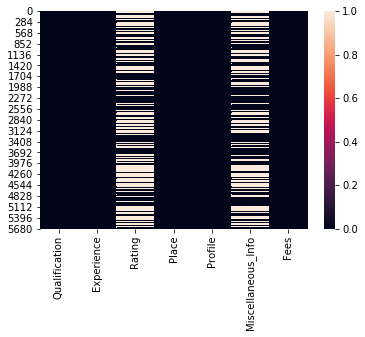

In [272]:
#Check the Null value through graph
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.isnull())
plt.show()

#### Here Rating Column and Miscellaneous_Info has maximum no of Null so I am deleting these Column

In [273]:
data.drop('Rating',axis=1,inplace=True)

In [274]:
data.drop('Miscellaneous_Info',axis=1,inplace=True)

In [275]:
data

,Qualification,Experience,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,"Keelkattalai, Chennai",Ayurveda,250
...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,"Basavanagudi, Bangalore",ENT Specialist,300
5957,MBBS,33 years experience,"Nungambakkam, Chennai",General Medicine,100
5958,MBBS,41 years experience,"Greater Kailash Part 2, Delhi",General Medicine,600
5959,"MBBS, MD - General Medicine",15 years experience,"Vileparle West, Mumbai",General Medicine,100


In [276]:
data.isnull().sum()

Qualification     0
Experience        0
Place            25
Profile           0
Fees              0
dtype: int64

#### Filling Null Values with Mode

In [277]:
for column in ['Place']:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [278]:
data.isnull().sum()

Qualification    0
Experience       0
Place            0
Profile          0
Fees             0
dtype: int64

In [279]:
data.dtypes

Qualification    object
Experience       object
Place            object
Profile          object
Fees              int64
dtype: object

#### Let's check the uniqueness of all columns

In [280]:
data['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

In [281]:
data['Experience'].unique()

array(['24 years experience', '12 years experience', '9 years experience',
       '20 years experience', '8 years experience', '42 years experience',
       '10 years experience', '14 years experience',
       '23 years experience', '5 years experience', '7 years experience',
       '21 years experience', '19 years experience',
       '41 years experience', '31 years experience',
       '25 years experience', '16 years experience',
       '15 years experience', '11 years experience',
       '22 years experience', '38 years experience', '6 years experience',
       '36 years experience', '13 years experience',
       '18 years experience', '46 years experience',
       '40 years experience', '49 years experience',
       '33 years experience', '0 years experience', '27 years experience',
       '30 years experience', '52 years experience',
       '60 years experience', '26 years experience',
       '35 years experience', '34 years experience',
       '39 years experience', '32 years exp

In [282]:
data['Place'].unique()

array(['Kakkanad, Ernakulam', 'Whitefield, Bangalore',
       'Mathikere - BEL, Bangalore', 'Bannerghatta Road, Bangalore',
       'Keelkattalai, Chennai', 'Porur, Chennai', 'Karol Bagh, Delhi',
       'Arekere, Bangalore', 'Old City, Hyderabad', 'Athani, Ernakulam',
       'Thousand Lights, Chennai', 'Somajiguda, Hyderabad',
       'Coimbatore Racecourse, Coimbatore', 'Jubilee Hills, Hyderabad',
       'Kondli, Delhi', 'Saroor Nagar, Hyderabad',
       'Tambaram West, Chennai', 'Purasawakkam, Chennai',
       'KPHB, Hyderabad', 'HSR Layout, Bangalore', 'Pollachi, Coimbatore',
       'Vasundhra Enclave, Delhi', 'Chembur, Mumbai',
       'Thammanam, Ernakulam', 'Andheri, Mumbai',
       'Pattom, Thiruvananthapuram', 'Kukatpally, Hyderabad',
       'Vadavalli, Coimbatore', 'Defence Colony, Delhi',
       'Banjara Hills, Hyderabad', 'Sion West, Mumbai', 'CR Park, Delhi',
       'Mogappair East, Chennai', 'IP Extension, Delhi',
       'Safdarjung Enclave, Delhi', 'New Friends Colony, Delhi

#### Here All the values of place are unique So I am deleting this column

In [283]:
data.drop('Place',axis=1,inplace=True)

In [284]:
data

,Qualification,Experience,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,Ayurveda,250
4,BAMS,20 years experience,Ayurveda,250
...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,ENT Specialist,300
5957,MBBS,33 years experience,General Medicine,100
5958,MBBS,41 years experience,General Medicine,600
5959,"MBBS, MD - General Medicine",15 years experience,General Medicine,100


In [285]:
data['Profile'].unique()

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

#### Converting the columns into Numeric Format

In [286]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [287]:
#For all those columns who has 6 attributes
from sklearn import preprocessing
for cols in data.columns:
    if(len(data[cols].value_counts()) ==6):#Unique values
        le_anima = preprocessing.LabelEncoder()
        data[cols] = le_anima.fit_transform(data[cols])

In [288]:
data

,Qualification,Experience,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,5,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,0,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,3,300
3,"BSc - Zoology, BAMS",12 years experience,0,250
4,BAMS,20 years experience,0,250
...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,3,300
5957,MBBS,33 years experience,4,100
5958,MBBS,41 years experience,4,600
5959,"MBBS, MD - General Medicine",15 years experience,4,100


#### Lets Convert Qualification Column into Numeric 

In [289]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [290]:
array = data['Qualification']

array.shapearray = data['Qualification']

array.shape

(5961,)

In [291]:
le=LabelEncoder()
data1=le.fit_transform(data['Qualification'])
data1

array([ 401,   73, 1135, ...,  596,  943,  243])

In [292]:
data['Qualification']=data1

In [293]:
data

,Qualification,Experience,Profile,Fees
0,401,24 years experience,5,100
1,73,12 years experience,0,350
2,1135,9 years experience,3,300
3,464,12 years experience,0,250
4,10,20 years experience,0,250
...,...,...,...,...
5956,1075,19 years experience,3,300
5957,596,33 years experience,4,100
5958,596,41 years experience,4,600
5959,943,15 years experience,4,100


#### Lets Convert Qualification Column into Experience

In [294]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [295]:
array = data['Experience']

array.shapearray = data['Experience']

array.shape

(5961,)

In [296]:
le=LabelEncoder()
data1=le.fit_transform(data['Experience'])
data1

array([16,  3, 63, ..., 35,  6,  8])

In [297]:
data['Experience']=data1

In [298]:
data

,Qualification,Experience,Profile,Fees
0,401,16,5,100
1,73,3,0,350
2,1135,63,3,300
3,464,3,0,250
4,10,12,0,250
...,...,...,...,...
5956,1075,10,3,300
5957,596,26,4,100
5958,596,35,4,600
5959,943,6,4,100


In [299]:
data.dtypes

Qualification    int32
Experience       int32
Profile          int32
Fees             int64
dtype: object

In [300]:
data = pd.DataFrame(data=data)
data

,Qualification,Experience,Profile,Fees
0,401,16,5,100
1,73,3,0,350
2,1135,63,3,300
3,464,3,0,250
4,10,12,0,250
...,...,...,...,...
5956,1075,10,3,300
5957,596,26,4,100
5958,596,35,4,600
5959,943,6,4,100


In [301]:
data.shape

(5961, 4)

In [302]:
data.describe()

,Qualification,Experience,Profile,Fees
count,5961.000000,5961.000000,5961.000000,5961.000000
mean,596.857574,23.010904,2.441872,307.944640
std,413.842446,20.937163,1.658014,190.920373
min,0.000000,0.000000,0.000000,5.000000
25%,219.000000,6.000000,1.000000,150.000000
50%,596.000000,15.000000,2.000000,300.000000
75%,943.000000,36.000000,4.000000,500.000000
max,1419.000000,63.000000,5.000000,950.000000


#### Find Out the Correlation

In [303]:
dfcor = data.corr()
dfcor

,Qualification,Experience,Profile,Fees
Qualification,1.000000,0.003325,0.393123,0.263214
Experience,0.003325,1.000000,-0.032711,-0.048529
Profile,0.393123,-0.032711,1.000000,0.145226
Fees,0.263214,-0.048529,0.145226,1.000000


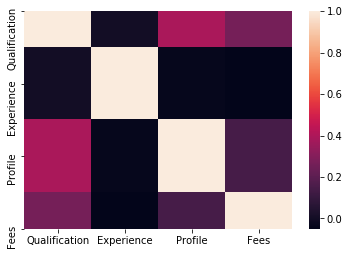

In [304]:
sns.heatmap(dfcor)

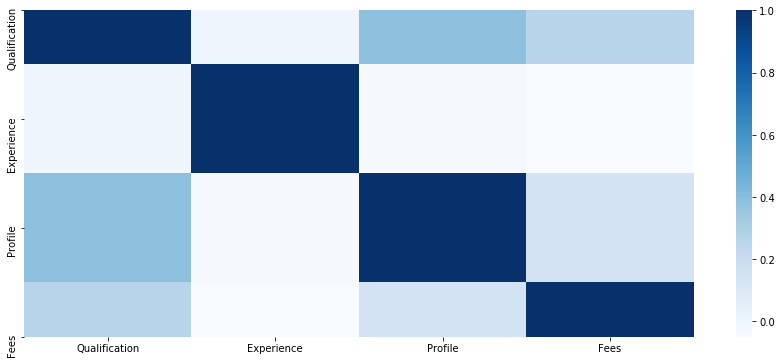

In [305]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,cmap='Blues',annot=False)

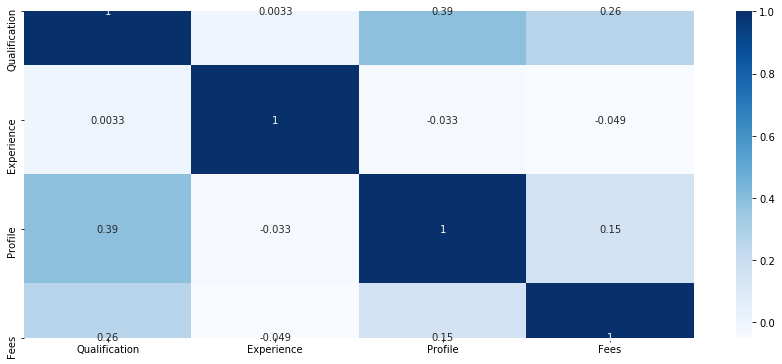

In [306]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,cmap='Blues',annot=True)

#### Removing the Outliers

In [307]:
#Lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(5961, 4)
(5941, 4)


#### Checking Skewness and Removing it

In [308]:
#Check Skewness 
data.skew()
#there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value

Qualification    0.239720
Experience       0.823531
Profile          0.108803
Fees             0.751870
dtype: float64

In [309]:
#Treating the skewness using log
import numpy as np
for col in data.columns:
#Here complete column name has been passed
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [310]:
#Lets Again Check the Skewness
data.skew()

Qualification    0.239720
Experience      -0.362028
Profile          0.108803
Fees            -0.298173
dtype: float64

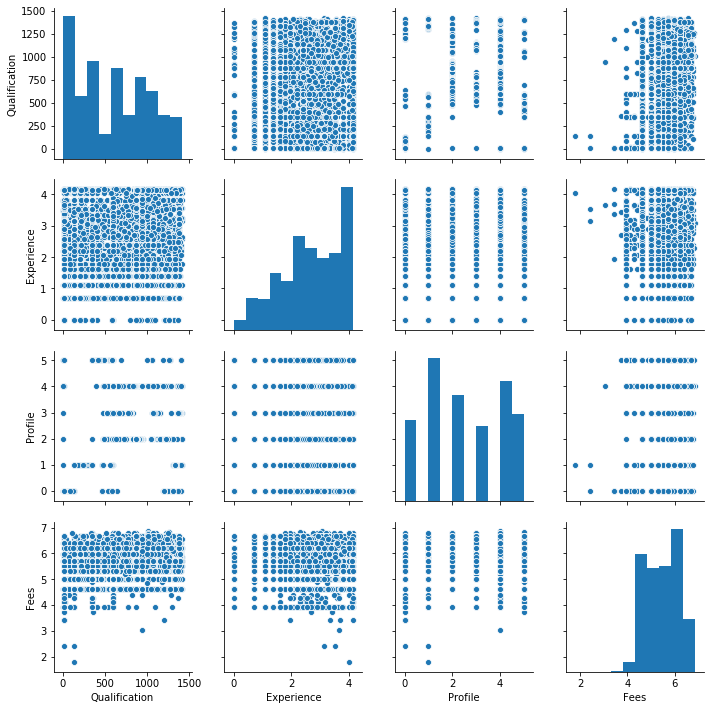

In [311]:
#Lets Check the pairplot using seaborn Library
import seaborn as sns
sns.pairplot(data)
plt.show()

### Plotting Boxplot through Iteration

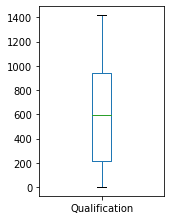

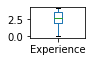

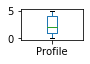

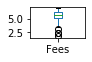

In [312]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    data.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

### Plotting Displot Through Iteration

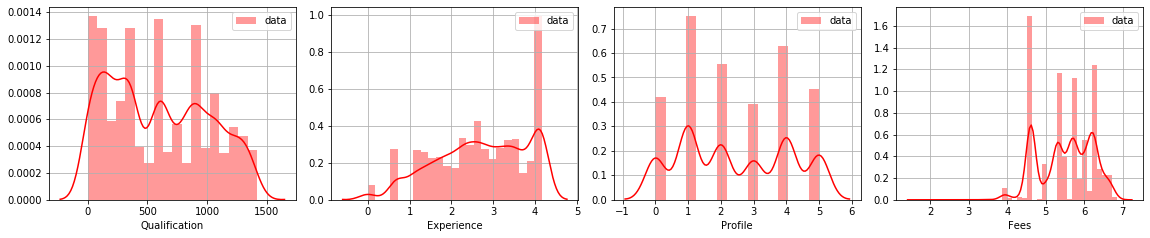

In [313]:
plt.figure(figsize=(20,16))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(data[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

In [314]:
data.columns

Index(['Qualification', 'Experience', 'Profile', 'Fees'], dtype='object')

### Line Plot

In [315]:
data.columns

Index(['Qualification', 'Experience', 'Profile', 'Fees'], dtype='object')

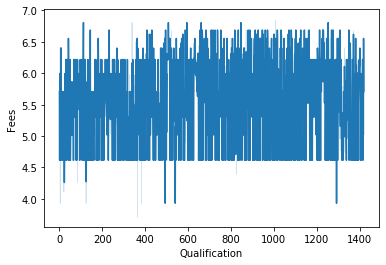

In [316]:
#Lets check the how Qualification is changing with respect to Fees
sns.lineplot(data["Qualification"],data["Fees"])
plt.show()

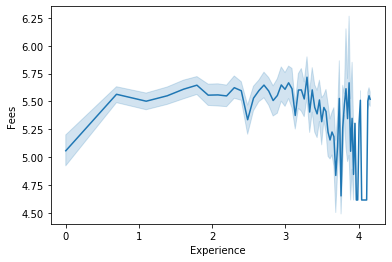

In [317]:
#Lets check the how Experience is changing with respect to Fees
sns.lineplot(data["Experience"],data["Fees"])
plt.show()

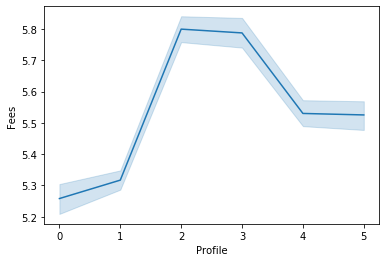

In [318]:
#Lets check the how Profile is changing with respect to Fees
sns.lineplot(data["Profile"],data["Fees"])
plt.show()

### Plotting Data using Scatter Plot

In [319]:
data.columns

Index(['Qualification', 'Experience', 'Profile', 'Fees'], dtype='object')

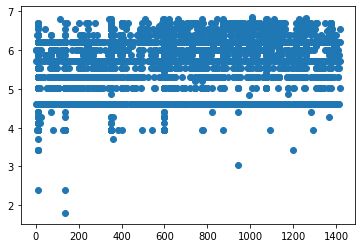

In [320]:
plt.scatter(data['Qualification'],data['Fees'])

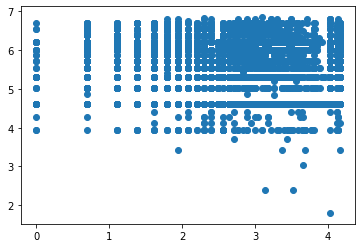

In [321]:
plt.scatter(data['Experience'],data['Fees'])

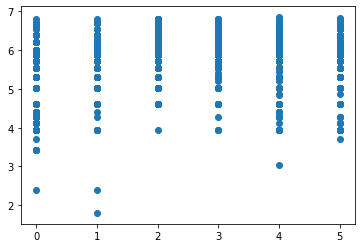

In [322]:
plt.scatter(data['Profile'],data['Fees'])

### Column Plot

In [323]:
collist = data.columns.values
ncols=12
nrows=10

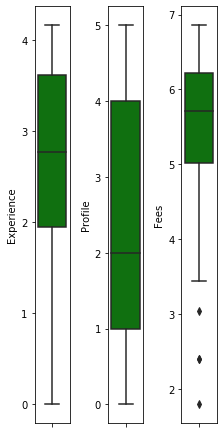

In [324]:
plt.figure(figsize=(ncols,5*ncols))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(data[collist[i]],color='green',orient='v')
    plt.tight_layout()

#### Separating X and Y Variable

In [325]:
data

,Qualification,Experience,Profile,Fees
0,401,2.833213,5,4.615121
1,73,1.386294,0,5.860786
2,1135,4.158883,3,5.707110
3,464,1.386294,0,5.525453
4,10,2.564949,0,5.525453
...,...,...,...,...
5956,1075,2.397895,3,5.707110
5957,596,3.295837,4,4.615121
5958,596,3.583519,4,6.398595
5959,943,1.945910,4,4.615121


In [326]:
X = data.drop("Fees", axis=1)

In [327]:
X

,Qualification,Experience,Profile
0,401,2.833213,5
1,73,1.386294,0
2,1135,4.158883,3
3,464,1.386294,0
4,10,2.564949,0
...,...,...,...
5956,1075,2.397895,3
5957,596,3.295837,4
5958,596,3.583519,4
5959,943,1.945910,4


In [328]:
Y = data["Fees"]
Y

0       4.615121
1       5.860786
2       5.707110
3       5.525453
4       5.525453
          ...   
5956    5.707110
5957    4.615121
5958    6.398595
5959    4.615121
5960    5.303305
Name: Fees, Length: 5961, dtype: float64

In [329]:
X.shape

(5961, 3)

In [330]:
Y.shape

(5961,)

In [331]:
Y = Y.values.reshape(-1,1)

In [332]:
Y

array([[4.61512052],
       [5.86078622],
       [5.70711026],
       ...,
       [6.39859493],
       [4.61512052],
       [5.30330491]])

In [333]:
Y.shape

(5961, 1)

#### Applying Linear Regression

In [334]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.33,random_state=39)

In [335]:
train_X.shape

(3993, 3)

In [336]:
train_Y.shape

(3993, 1)

In [337]:
test_X.shape

(1968, 3)

In [338]:
test_Y.shape

(1968, 1)

In [339]:
lg = LinearRegression()

In [340]:
lg.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [341]:
lg.coef_

array([[ 0.00033275, -0.01870054,  0.01845487]])

In [342]:
lg.intercept_

array([5.33049778])

In [343]:
lg.score(train_X,train_Y)

0.051690980202584225

In [344]:
#predict the value
pred=lg.predict(test_X)
print("Predicted result price:",pred)
print("actual price",test_Y)

Predicted result price: [[5.77222891]
 [5.63264148]
 [5.48551674]
 ...
 [5.26733836]
 [5.47362341]
 [5.64210077]]
actual price [[5.30330491]
 [4.61512052]
 [6.11146734]
 ...
 [4.61512052]
 [5.86078622]
 [6.39859493]]


In [345]:
print('error:')

print('Mean absolute error:',mean_absolute_error(test_Y,pred))
print('Mean sqaured error:',mean_squared_error(test_Y,pred))

print('Root mean squared error:',np.sqrt(mean_squared_error(test_Y,pred)))

error:
Mean absolute error: 0.5477327065084302
Mean sqaured error: 0.4354966262036013
Root mean squared error: 0.6599216818711151


#### Boost through GradientBoostRegressor By using Parameters

In [346]:
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(train_X, train_Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [347]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = modelgbr.score(train_X,train_Y)
print("model_Score:",model_score)


y_predictedgbr = modelgbr.predict(test_X)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(test_Y, y_predictedgbr))
# Explained variance score: 1 is perfect prediction
print('R2 Score: %.2f' % r2_score(test_Y, y_predictedgbr))

model_Score: 0.19690572961137046
Mean squared error: 0.40
R2 Score: 0.15


#### Lets Visualize the Goodness of the Prediction

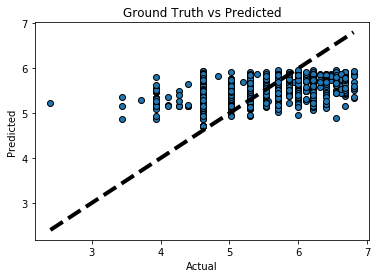

In [348]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, y_predictedgbr, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

#### Boosting through AdaBoostRegressor

In [349]:
#Now Lets use ada boost regression algorithm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],"base_estimator":[lreg,lsreg,DecisionTreeRegressor()]}
clf2 = GridSearchCV(ada_reg,parameters,cv=5)
clf2.fit(X,Y)
clf2.best_params_

{'base_estimator': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 'learning_rate': 0.1,
 'n_estimators': 10}

In [350]:
add_reg=AdaBoostRegressor(base_estimator=lsreg,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.05875360733170667
Standard deviation in r2 score for ada boosting Regression:  0.017143771221125995


In [351]:
#Lets check maximum r2_score corresponding to this
r_state=maxr2_score(ada_reg,X,Y)

r2 score corresponding to  42 is 0.020792532624962945
r2 score corresponding to  43 is 0.06045725689207415
r2 score corresponding to  44 is 0.05370416216763929
r2 score corresponding to  45 is 0.09689043181989576
r2 score corresponding to  46 is 0.061279137160122565
r2 score corresponding to  47 is 0.054372436732553986
r2 score corresponding to  48 is 0.06238353962962562
r2 score corresponding to  49 is 0.08410714415519993
r2 score corresponding to  50 is 0.06301450810659792
r2 score corresponding to  51 is 0.051721941097748525
r2 score corresponding to  52 is 0.03995599548719109
r2 score corresponding to  53 is 0.10253878636860081
r2 score corresponding to  54 is 0.04618289966724398
r2 score corresponding to  55 is 0.05372059616666869
r2 score corresponding to  56 is 0.06623624148685248
r2 score corresponding to  57 is 0.05627236397640767
r2 score corresponding to  58 is 0.03531284942037172
r2 score corresponding to  59 is 0.08344995362075314
r2 score corresponding to  60 is 0.0971661

In [352]:
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,random_state=86,test_size=0.20)
clf2.fit(train_X,train_Y)
y_pred=clf2.predict(test_X)

In [353]:
#Lets find the rmse and r2_score using sklearn.metrics
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(test_Y,y_pred)))
print("r2_score is: ",r2_score(test_Y,y_pred))

RMSE is:  0.6613147038597711
r2_score is:  0.06318742184383119


### Linear Regression using Recursion

In [354]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,random_state=55,test_size=0.20)

In [355]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,X,Y):
    max_r_score=0
    for r_state in range(42,100):
        train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.20,random_state=r_state)
        regr.fit(train_X,train_Y)
        y_pred = regr.predict(test_X)
        r2_scr=r2_score(test_Y,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state

In [356]:
# Lets use LinearRegression and check the max r2 score corresponding to different state
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
r_state = maxr2_score(lreg,X,Y)

r2 score corresponding to  42 is 0.055017695298930636
r2 score corresponding to  43 is 0.0629427883275614
r2 score corresponding to  44 is 0.07891369708370777
r2 score corresponding to  45 is 0.06431088004539176
r2 score corresponding to  46 is 0.04903417131397203
r2 score corresponding to  47 is 0.041664599885315234
r2 score corresponding to  48 is 0.06403103211738015
r2 score corresponding to  49 is 0.07659603586674812
r2 score corresponding to  50 is 0.06495211282247537
r2 score corresponding to  51 is 0.06276734438360287
r2 score corresponding to  52 is 0.044671189290161784
r2 score corresponding to  53 is 0.048058902670937154
r2 score corresponding to  54 is 0.06132000776906277
r2 score corresponding to  55 is 0.05053424289797903
r2 score corresponding to  56 is 0.06429009314388523
r2 score corresponding to  57 is 0.060335395384669255
r2 score corresponding to  58 is 0.0505855408300141
r2 score corresponding to  59 is 0.07888693955024761
r2 score corresponding to  60 is 0.06822479

### KNN Model

In [357]:
from sklearn.neighbors import KNeighborsRegressor
knr1 = KNeighborsRegressor()
knr1.fit(train_X,train_Y)
knr1.score(train_X,train_Y)
predicted=knr1.predict(test_X)
print("Mean squared error of linear svc: %.2f"% mean_squared_error(test_Y,predicted))
print('R2 Score of linear svc: %.2f' % r2_score(test_Y, predicted))

Mean squared error of linear svc: 0.46
R2 Score of linear svc: -0.00


### Lets use grid_search to find optimal value of n_neighbors for KNN Model

In [358]:
#Lets use the Grid Search to Find the Optimal Value of n_neighbors in Knn Model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors
neighbors={"n_neighbors":range(1,30)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=10)
gknr.fit(X,Y)
gknr.best_params_

{'n_neighbors': 29}

In [359]:
#Lets Use Knn Regression and Check max r2 score corresponding to different random states
knr = KNeighborsRegressor(n_neighbors=29)
r_state = maxr2_score(knr,X,Y)

r2 score corresponding to  42 is 0.09539983165504629
r2 score corresponding to  43 is 0.09343174971863111
r2 score corresponding to  44 is 0.14402837965461035
r2 score corresponding to  45 is 0.12110020607185634
r2 score corresponding to  46 is 0.11811702361059451
r2 score corresponding to  47 is 0.10118261774251025
r2 score corresponding to  48 is 0.10529479353116145
r2 score corresponding to  49 is 0.128134827478662
r2 score corresponding to  50 is 0.1136025078374504
r2 score corresponding to  51 is 0.09389717117277363
r2 score corresponding to  52 is 0.07787573604400211
r2 score corresponding to  53 is 0.1136658505964484
r2 score corresponding to  54 is 0.12162393340041544
r2 score corresponding to  55 is 0.09860788358109751
r2 score corresponding to  56 is 0.11401096934982913
r2 score corresponding to  57 is 0.11921517971165108
r2 score corresponding to  58 is 0.07803932049772777
r2 score corresponding to  59 is 0.12009585288488256
r2 score corresponding to  60 is 0.162124751064228

In [360]:
#Lets check the mean r2 score of both linear regression model and knn regression 
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 scorefor Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression: ",cross_val_score(knr,X,Y,cv=5,scoring="r2").mean())
print("Stadard deviation in r2 score for KNN Regression:",cross_val_score(knr,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression: 0.06143555996696985
Standard deviation in r2 scorefor Linear Regression: 0.008013648259208517

Mean r2 score for KNN Regression:  0.10947438897921564
Stadard deviation in r2 score for KNN Regression: 0.016667015449087864


### Boosting Linear Regression

In [361]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg1=AdaBoostRegressor()
add_reg1=AdaBoostRegressor(base_estimator=lreg,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.06039280550716404
Standard deviation in r2 score for ada boosting Regression:  0.025053046391865605


### Boosting KNN model

In [362]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg2=AdaBoostRegressor()
add_reg2=AdaBoostRegressor(base_estimator=knr,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.060480058297768056
Standard deviation in r2 score for ada boosting Regression:  0.016679921537481185


#### Lets check lasso regression and best value of alpha

In [363]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg,parameters,cv=10)
clf.fit(X,Y)
clf.best_params_

{'alpha': 0.001}

In [364]:
#Lets use cross val score with Lasso
lasso_grs=Lasso(alpha = 0.001)
print("Mean r2 score for Lasso Regression: ",cross_val_score(lasso_grs,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for Lasso Regression: ",cross_val_score(lasso_grs,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression:  0.06143626655919578
Standard deviation in r2 score for Lasso Regression:  0.007923913266632224


### Boosting Lasso Regressor

In [365]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg3=AdaBoostRegressor()
add_reg3=AdaBoostRegressor(base_estimator=lasso_grs,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg3,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg3,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.06396083254749899
Standard deviation in r2 score for ada boosting Regression:  0.02626010328246114


### Support Vector Regression

In [366]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svr1 = SVR(kernel = "rbf")
svr1.fit(train_X,train_Y)
svr1.score(train_X,train_Y)
y_pred1=svr1.predict(test_X)
print("Mean squared error of linear svc: %.2f"% mean_squared_error(test_Y,y_pred1))
print('R2 Score of linear svc: %.2f' % r2_score(test_Y, y_pred1))

Mean squared error of linear svc: 0.46
R2 Score of linear svc: -0.00


### Boosting Support Vector Machine

In [367]:
from sklearn.ensemble import AdaBoostRegressor

In [368]:
ada_reg4=AdaBoostRegressor()
add_reg4=AdaBoostRegressor(base_estimator=svr1,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg4,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg4,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.06459275220631606
Standard deviation in r2 score for ada boosting Regression:  0.025126653432089228


### Decision Tree Regressor

In [369]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
  

dtregressor = DecisionTreeRegressor(random_state = 0)  
  
 
dtregressor.fit(X, Y) 

dtregressor.score(train_X,train_Y)
y_pred4=dtregressor.predict(test_X)
print("Mean squared error of Decision Tree Regressor: %.2f"% mean_squared_error(test_Y,y_pred4))
print('R2 Score : %.2f' % r2_score(test_Y, y_pred4))

Mean squared error of Decision Tree Regressor: 0.19
R2 Score : 0.60


#### Lets Visualize the Goodness of the Prediction

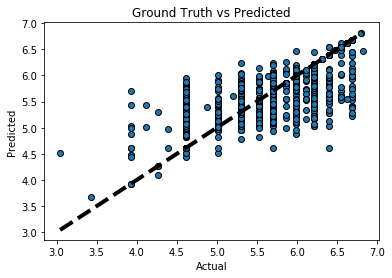

In [370]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, y_pred4, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [371]:
#predict the value
pred=dtregressor.predict(test_X)
print("Predicted result price:",pred)
print("actual price",test_Y)

Predicted result price: [5.19996945 5.91217237 5.23241667 ... 5.69094085 6.55250789 5.30330491]
actual price [[5.01727984]
 [5.30330491]
 [5.30330491]
 ...
 [4.61512052]
 [6.55250789]
 [5.30330491]]


### Decision Tree Regressor Using GridSearchCV

In [372]:
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(X,Y)
print("R-Squared on train dataset={}".format(dtm.score(test_X,test_Y)))

dtm.fit(test_X,test_Y)   
print("R-Squaredon test dataset={}".format(dtm.score(test_X,test_Y)))

R-Squared on train dataset=0.10605313661589
R-Squaredon test dataset=0.13048970851401975


In [373]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }


grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=5)

grid_cv_dtm.fit(X,Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=4,
                                             max_features=None,
                                             max_leaf_nodes=10,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=5,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                      

In [374]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::0.12735513528061088
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 6, 'max_leaf_nodes': 100, 'min_samples_leaf': 100, 'min_samples_split': 40}


### Boosting Decision Tree

In [375]:
from sklearn.ensemble import AdaBoostRegressor

In [376]:
ada_reg5=AdaBoostRegressor()
add_reg5=AdaBoostRegressor(base_estimator=dtm,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(add_reg5,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(add_reg5,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.11788387685321877
Standard deviation in r2 score for ada boosting Regression:  0.01191664157100973


### Random Forest Regressor

In [377]:
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(n_estimators=5)
rfregressor.fit(train_X, train_Y)
y_pred5 = rfregressor.predict(test_X)
print("Mean squared error of poly svc: %.2f"% mean_squared_error(test_Y,y_pred5))
print('R2 Score : %.2f' % r2_score(test_Y, y_pred5))

Mean squared error of poly svc: 0.52
R2 Score : -0.13


#### Random Forest Regressor with GridSearchCV

In [1]:
rf_gs = RandomForestRegressor(n_estimators=100)

NameError: name 'RandomForestRegressor' is not defined

In [379]:
n_features = X.shape[1]

In [380]:
from sklearn.model_selection import RandomizedSearchCV
grid = RandomizedSearchCV(rf_gs, n_iter=20, 
            param_distributions=dict(
                                          max_depth=np.arange(5,20+1), 
                                          max_features=np.arange(1, n_features+1)
                                    )
         )
grid.fit(X, Y)
print(grid.best_params_)

{'max_features': 1, 'max_depth': 7}


In [381]:
rf_gss = RandomForestRegressor(max_features = 2, max_depth = 7)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(rf_gss,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(rf_gss,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.12896381555047576
Standard deviation in r2 score for ada boosting Regression:  0.013795481236036139


#### Boosting RandomForestRegressor

In [382]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg6=AdaBoostRegressor()
add_reg6=AdaBoostRegressor(base_estimator=rfregressor,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(add_reg6,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(add_reg6,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  -0.031875565855079335
Standard deviation in r2 score for ada boosting Regression:  0.030629672617318103


#### NOTE::All models,dtregressor gives the Highest r2 score(0.60) and mean squared error is  0.19 so we are going to save this model

In [383]:
import pickle
filename = 'Doctors.sav'
pickle.dump(dtregressor, open(filename, 'wb'))

In [384]:
# Load model from disk and use it to make new predictions
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(test_X, test_Y)
print(result)

0.6001313909056625


### Test Dataset of Doctors Fees

In [385]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [386]:
data1 = pd.read_excel('Final_Test.xlsx')
data1

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


### Exploratory Data Analysis

In [387]:
data1.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [388]:
data1.tail()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...
1986,"MBBS, MD - Dermatology , Venereology & Leprosy",8 years experience,NaN,"Pallikaranai, Chennai",Dermatologists,"1 Feedback Pallikaranai, Chennai ₹500"


#### Lets check the null values without using visualization

In [389]:
data1.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

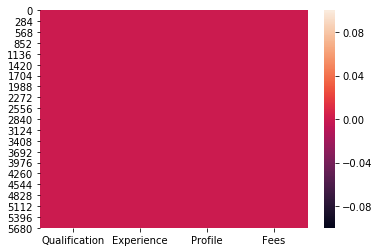

In [390]:
#Check the Null value through graph
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.isnull())
plt.show()

#### Converting the  Testing Data into the same format like Training Dataset

In [391]:
data1.drop('Rating',axis=1,inplace=True)

In [392]:
data1.drop('Miscellaneous_Info',axis=1,inplace=True)

In [393]:
data1.isnull().sum()

Qualification    0
Experience       0
Place            6
Profile          0
dtype: int64

In [394]:
for column in ['Place']:
    data1[column].fillna(data1[column].mode()[0], inplace=True)

In [415]:
data1.drop('Place',axis=1,inplace=True)

In [416]:
data1.isnull().sum()

Qualification    0
Experience       0
Profile          0
dtype: int64

In [417]:
data1.dtypes

Qualification    int32
Experience       int32
Profile          int32
dtype: object

#### Converting the columns into Numeric Format

In [418]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [419]:
#For all those columns who has 6 attributes
from sklearn import preprocessing
for cols in data1.columns:
    if(len(data1[cols].value_counts()) ==6):#Unique values
        le_anima = preprocessing.LabelEncoder()
        data1[cols] = le_anima.fit_transform(data1[cols])

In [420]:
data1

,Qualification,Experience,Profile
0,241,28,4
1,340,24,3
2,258,34,2
3,6,0,0
4,79,7,1
...,...,...,...
1982,17,1,0
1983,548,33,2
1984,474,56,4
1985,51,3,1


In [421]:
data1

,Qualification,Experience,Profile
0,241,28,4
1,340,24,3
2,258,34,2
3,6,0,0
4,79,7,1
...,...,...,...
1982,17,1,0
1983,548,33,2
1984,474,56,4
1985,51,3,1


#### Lets Convert Qualification Column into Numeric

In [422]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [423]:
array = data1['Qualification']

array.shapearray = data1['Qualification']

array.shape

(1987,)

In [424]:
le=LabelEncoder()
data2=le.fit_transform(data1['Qualification'])
data2

array([241, 340, 258, ..., 474,  51, 384], dtype=int64)

In [425]:
data1['Qualification']=data2

In [426]:
data2

array([241, 340, 258, ..., 474,  51, 384], dtype=int64)

In [427]:
data1

,Qualification,Experience,Profile
0,241,28,4
1,340,24,3
2,258,34,2
3,6,0,0
4,79,7,1
...,...,...,...
1982,17,1,0
1983,548,33,2
1984,474,56,4
1985,51,3,1


#### Lets Convert Exeprience Column into Numeric

In [428]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [429]:
array = data1['Experience']

array.shapearray = data1['Experience']

array.shape

(1987,)

In [430]:
le=LabelEncoder()
data2=le.fit_transform(data1['Experience'])
data2

array([28, 24, 34, ..., 56,  3, 55], dtype=int64)

In [431]:
data1['Experience']=data2

In [432]:
data2

array([28, 24, 34, ..., 56,  3, 55], dtype=int64)

In [433]:
data1

,Qualification,Experience,Profile
0,241,28,4
1,340,24,3
2,258,34,2
3,6,0,0
4,79,7,1
...,...,...,...
1982,17,1,0
1983,548,33,2
1984,474,56,4
1985,51,3,1


In [434]:
data1.dtypes

Qualification    int64
Experience       int64
Profile          int64
dtype: object

In [435]:
data1.describe()

,Qualification,Experience,Profile
count,1987.000000,1987.000000,1987.000000
mean,259.979869,21.884248,2.508807
std,185.961177,18.772896,1.654223
min,0.000000,0.000000,0.000000
25%,93.000000,6.000000,1.000000
50%,241.000000,15.000000,2.000000
75%,417.000000,35.000000,4.000000
max,629.000000,56.000000,5.000000


#### Removing the Outliers

In [438]:
#Lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(data1))
print(data1.shape)
data1_final=data1.loc[(z_score<3).all(axis=1)]
print(data1_final.shape)

(1987, 3)
(1987, 3)


#### Checking Skewness and Removing it

In [439]:
#Check Skewness 
data1.skew()
#there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value

Qualification    0.280822
Experience       0.687595
Profile          0.028926
dtype: float64

In [440]:
#Treating the skewness using log
import numpy as np
for col in data1.columns:
#Here complete column name has been passed
    if data1.skew().loc[col]>0.55:
        data1[col]=np.log1p(data1[col])

In [441]:
#Lets Again Check the Skewness
data1.skew()

Qualification    0.280822
Experience      -0.474469
Profile          0.028926
dtype: float64

### Load Test Dataset into dtregressor Model 

In [442]:
train_X = data1
pred = dtregressor.predict(train_X)
print(pred)

[5.30330491 4.9791171  5.52545294 ... 6.39859493 4.61512052 5.99396143]


#### Compare the Predicted Result with Actual Price of Testing DataSet Using dtregressor Model 

In [443]:
#predict the value
pred1=dtregressor.predict(test_X)
print("Predicted result price:",pred1)
print("actual price",test_Y)

Predicted result price: [5.19996945 5.91217237 5.23241667 ... 5.69094085 6.55250789 5.30330491]
actual price [[5.01727984]
 [5.30330491]
 [5.30330491]
 ...
 [4.61512052]
 [6.55250789]
 [5.30330491]]
